In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from matplotlib.ticker import FuncFormatter

In [18]:
def waterfall(index = ['sales','returns','credit fees','rebates','late charges','shipping'],
              data = [350000,-30000,-7500,-25000,95000,-7000],
              Title = "Example Chart", x_lab = "Increments"):
    
    changes = {'amount' : data}

    #Store data and create a blank series to use for the waterfall
    trans = pd.DataFrame(data=changes,index=index)
    blank = trans.amount.cumsum().shift(1).fillna(0)

    #Get the net total number for the final element in the waterfall
    total = trans.sum().amount
    trans.loc["net"]= total
    blank.loc["net"] = total

    #The steps graphically show the levels as well as used for label placement
    step = blank.reset_index(drop=True).repeat(3).shift(-1)
    step[1::3] = np.nan

    #When plotting the last element, we want to show the full bar,
    #Set the blank to 0
    blank.loc["net"] = 0

    #Plot and label
    my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, figsize=(10, 5), title=Title)
    #my_plot.plot(step.index, step.values,'k') #this makes the blank lines
    my_plot.set_xlabel(x_lab)

    #Get the y-axis position for the labels
    y_height = trans.amount.cumsum().shift(1).fillna(0)

    #Get an offset so labels don't sit right on top of the bar
    max = trans.max()
    neg_offset = max / 25
    pos_offset = max / 50
    plot_offset = int(max / 15)

    #Start label loop
    loop = 0
    for index, row in trans.iterrows():
        # For the last item in the list, we don't want to double count
        if row['amount'] == total:
            y = y_height[loop]
        else:
            y = y_height[loop] + row['amount']
        # Determine if we want a neg or pos offset
        if row['amount'] > 0:
            y += pos_offset
        else:
            y -= neg_offset
        my_plot.annotate("{:,.0f}".format(row['amount']),(loop,y),ha="center")
        loop+=1

    #Scale up the y axis so there is room for the labels
    my_plot.set_ylim(0,blank.max()+int(plot_offset))
    #Rotate the labels
    my_plot.set_xticklabels(trans.index,rotation=0)
    my_plot.get_figure().savefig("waterfall_%s.png" % Title.replace(" ", "-"),dpi=600,bbox_inches='tight')
    
    return my_plot

In [19]:
def waterfall_money(index = ['sales','returns','credit fees','rebates','late charges','shipping'],
              data = [350000,-30000,-7500,-25000,95000,-7000],
              Title = "Example Chart", currency_symbol="$", x_lab = "Transaction Types"):
    
    money_format = "{:,.0f} " + currency_symbol
    
    def money(x, pos):
        'The two args are the value and tick position'
        return money_format.format(x)
    formatter = FuncFormatter(money)
    
    changes = {'amount' : data}

    #Store data and create a blank series to use for the waterfall
    trans = pd.DataFrame(data=changes,index=index)
    blank = trans.amount.cumsum().shift(1).fillna(0)

    #Get the net total number for the final element in the waterfall
    total = trans.sum().amount
    trans.loc["net"]= total
    blank.loc["net"] = total

    #The steps graphically show the levels as well as used for label placement
    step = blank.reset_index(drop=True).repeat(3).shift(-1)
    step[1::3] = np.nan

    #When plotting the last element, we want to show the full bar,
    #Set the blank to 0
    blank.loc["net"] = 0

    #Plot and label
    my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, figsize=(10, 5), title=Title)
    #my_plot.plot(step.index, step.values,'k') #this makes the blank lines
    my_plot.set_xlabel(x_lab)

    #Format the axis for dollars
    my_plot.yaxis.set_major_formatter(formatter)

    #Get the y-axis position for the labels
    y_height = trans.amount.cumsum().shift(1).fillna(0)

    #Get an offset so labels don't sit right on top of the bar
    max = trans.max()
    neg_offset = max / 25
    pos_offset = max / 50
    plot_offset = int(max / 15)

    #Start label loop
    loop = 0
    for index, row in trans.iterrows():
        # For the last item in the list, we don't want to double count
        if row['amount'] == total:
            y = y_height[loop]
        else:
            y = y_height[loop] + row['amount']
        # Determine if we want a neg or pos offset
        if row['amount'] > 0:
            y += pos_offset
        else:
            y -= neg_offset
        my_plot.annotate(money_format.format(row['amount']),(loop,y),ha="center")
        loop+=1

    #Scale up the y axis so there is room for the labels
    my_plot.set_ylim(0,blank.max()+int(plot_offset))
    #Rotate the labels
    my_plot.set_xticklabels(trans.index,rotation=0)
    my_plot.get_figure().savefig("waterfall_money_%s.png" % Title.replace(" ", "-"),dpi=600,bbox_inches='tight')
    
    return my_plot

In [20]:
#Data to plot. Do not include a total, it will be calculated
a = ['sales','returns','credit fees','rebates','late charges','shipping']
b = [350000,-30000,-7500,-25000,95000,-7000]

In [21]:
a = ['sales','returns','credit fees','rebates']
b = [350000,-30000,-7500,-25000]

In [22]:
a = ['sales','late charges','shipping']
b = [350000,95000,-7000]

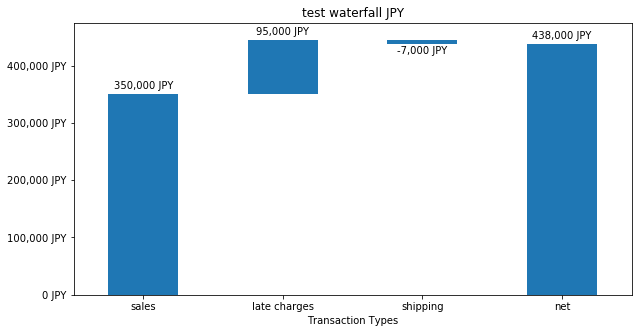

In [23]:
plot = waterfall_money(a, b, "test waterfall JPY", "JPY")

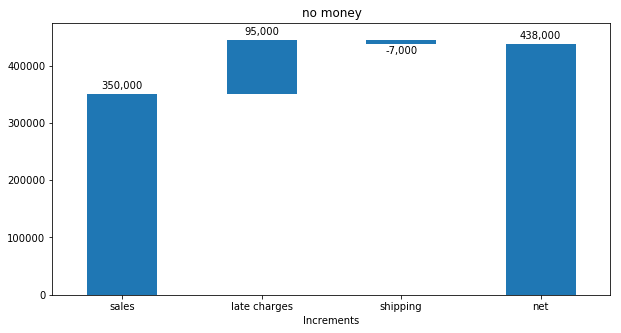

In [24]:
plot = waterfall(a,b,"no money")

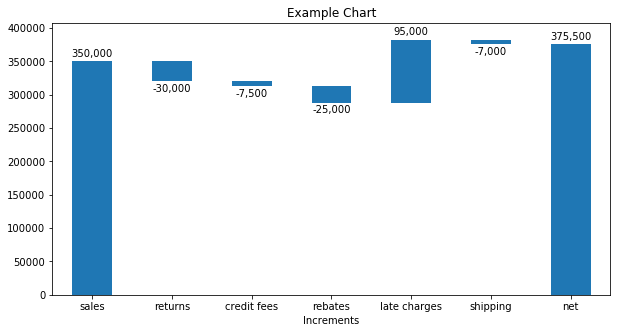

In [25]:
plot = waterfall()

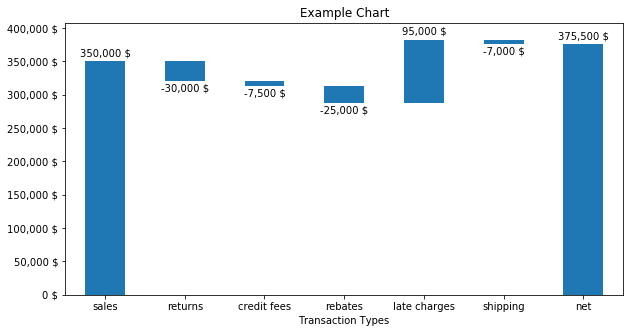

In [26]:
plot = waterfall_money()